In [53]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Импорт данных

In [55]:
xl = pd.ExcelFile('Weekly Fuel Prices.xlsx')
xl.sheet_names
rawdata = xl.parse("All years")
rawdata


,Date,Petrol (USD),Diesel (USD)
0,2003-06-09 00:00:00,74.590284,76.773394
1,2003-06-16 00:00:00,74.469143,76.689054
2,2003-06-23 00:00:00,74.423566,76.620546
3,2003-06-30 00:00:00,74.352421,76.505260
4,2003-07-07 00:00:00,74.283737,76.457376
...,...,...,...
878,2020-04-06 00:00:00,110.234797,116.833354
879,2020-04-13 00:00:00,109.265819,116.150812
880,2020-04-20 00:00:00,108.632747,115.732573
881,NaN,NaN,NaN


In [56]:
df = pd.DataFrame({"Date" : rawdata['Date'], "Diesel" : rawdata["Diesel (USD)"]})
df = df.dropna()
df = df[:-1]
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index("Date").sort_index()

In [57]:
df

,Diesel
Date,
2003-06-09,76.773394
2003-06-16,76.689054
2003-06-23,76.620546
2003-06-30,76.505260
2003-07-07,76.457376
...,...
2020-03-16,124.363474
2020-03-23,123.409485
2020-03-30,118.597998


In [58]:
df.describe()

,Diesel
count,880.000000
mean,115.614541
std,19.727116
min,76.408120
25%,98.510391
50%,118.603630
75%,132.874260
max,148.037710


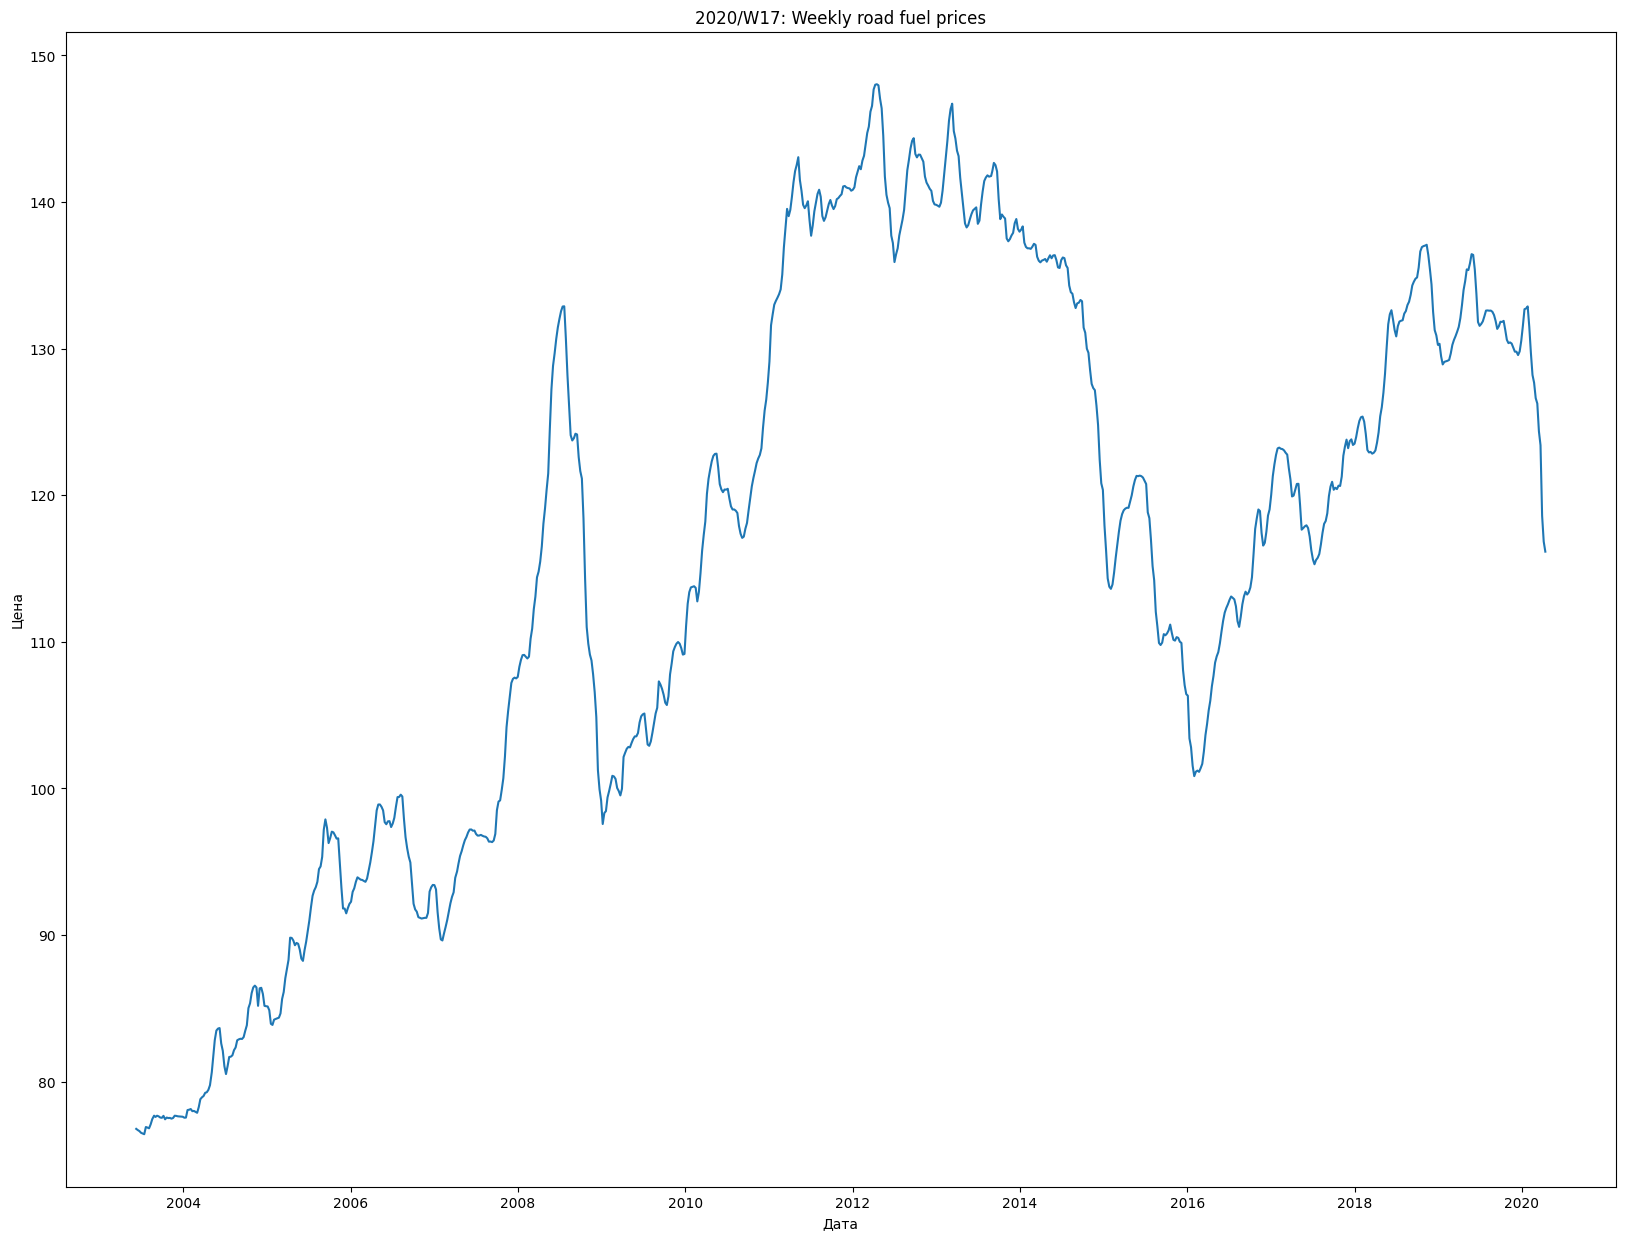

In [59]:
def plot_assignation(axp, data, xlabel, ylabel, title1):
    axp.plot(data)
    axp.set_xlabel(xlabel)
    axp.set_ylabel(ylabel)
    axp.set_title(title1)

fig, axs = plt.subplots(1,1,figsize=(20, 15))
plot_assignation(axs, df["Diesel"], 'Дата', 'Цена','2020/W17: Weekly road fuel prices')
